In [27]:
!pip install pyecharts==0.1.9.4

  Using cached pyecharts-0.1.9.4-py2.py3-none-any.whl (2.2 MB)
  Attempting uninstall: pyecharts
    Found existing installation: pyecharts 1.7.1
    Uninstalling pyecharts-1.7.1:
      Successfully uninstalled pyecharts-1.7.1


In [3]:
import numpy as np
import pandas as pd
import re
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
import joblib
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split

import datetime
import json
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
from pylab import mpl
#from pyecharts.charts import Geo
#from pyecharts.charts import Pie , Page , WordCloud
'''
from pyecharts.globals import ThemeType
from pyecharts.globals import SymbolType
import pyecharts.options as opts
'''


import seaborn as sns
from datetime import datetime
import warnings

sns.set_style(
    # 图形风格
    "whitegrid", 
    # 网格默认不显示
    {'axes.grid' : False})

sns.set_context(rc={
    # 标题大小
    'axes.titlesize': 25,
    # 轴的上标题大小
    'axes.labelsize': 20,
    # x轴刻度文字大小
    'xtick.labelsize': 15, 
    # y轴刻度文字大小
    'ytick.labelsize': 15})

plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus'] = False  # 负号正常显示

warnings.filterwarnings('ignore')

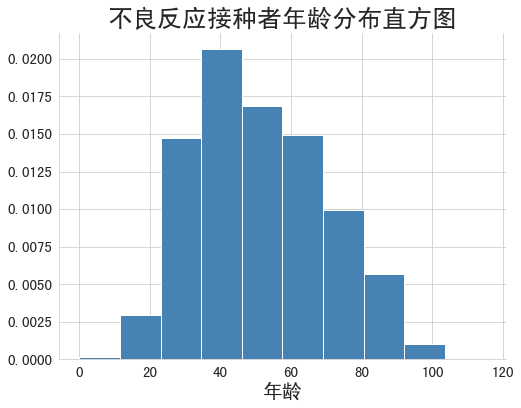

In [4]:
data = pd.read_csv('2021VAERSDATA.csv',sep=',', encoding = "ISO-8859-1")
plt.figure(figsize=(8, 6))
plt.hist(data['AGE_YRS'], color='steelblue', density=True)
sns.despine()
plt.grid()
plt.xlabel('年龄')
plt.title('不良反应接种者年龄分布直方图')
plt.savefig('年龄分布直方图.jpg')

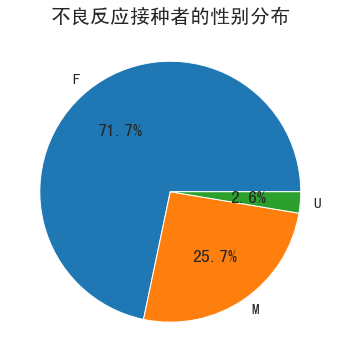

In [6]:
plt.figure(figsize=(6, 6))
sex_count = data['SEX'].value_counts()
patches, texts, autotexts = plt.pie(sex_count, labels=sex_count.index, 
                                    autopct='%1.1f%%')
# 调整饼图中的文字大小
plt.setp(autotexts, size=18)
plt.setp(texts, size=15)
plt.title('不良反应接种者的性别分布', size=20)
plt.savefig('不良反应接种者的性别分布.jpg')

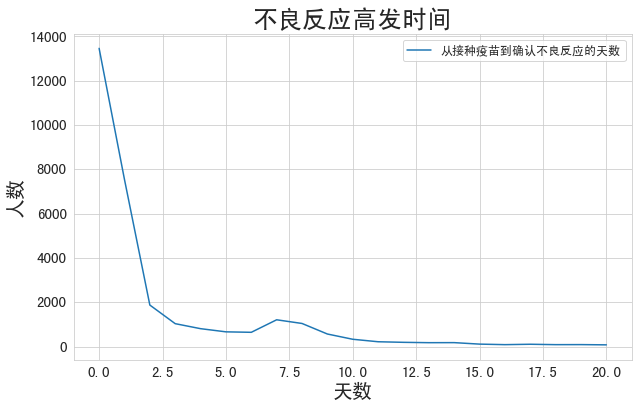

In [7]:
plt.figure(figsize=(10, 6))
numdays_count =data[ data['NUMDAYS']<=20]['NUMDAYS'].value_counts()

sns.lineplot(numdays_count.index,numdays_count.values, data=numdays_count, label='从接种疫苗到确认不良反应的天数')


plt.grid()
plt.legend(fancybox=True, prop={'size': 12})
plt.xlabel('天数')
plt.ylabel('人数')
plt.title('不良反应高发时间')
plt.savefig('不良反应高发时间.jpg')

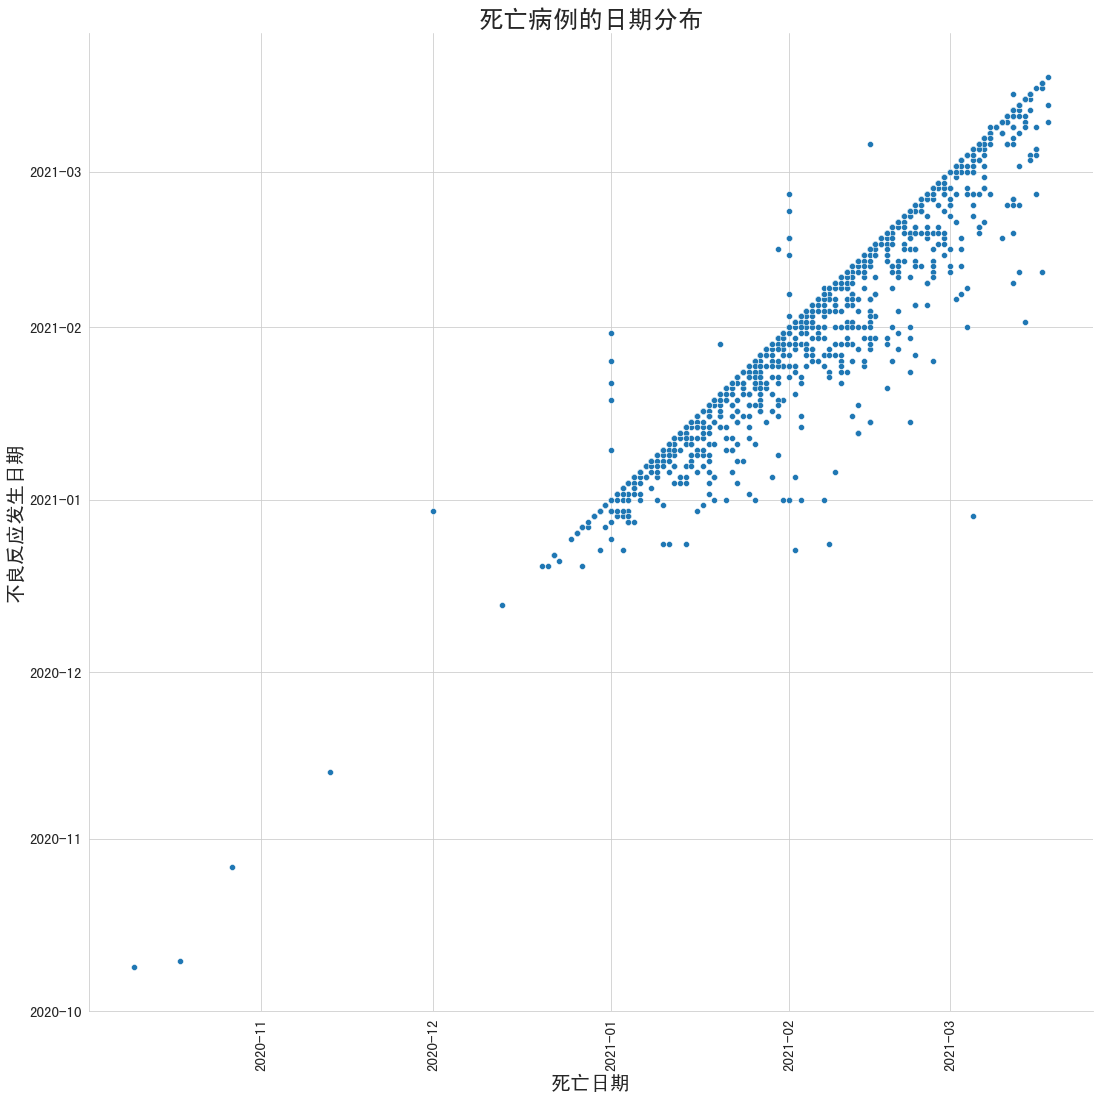

In [8]:
plt.figure(figsize=(18,18))
a = data[data['DATEDIED'].notnull() == 1]
a = a[a['ONSET_DATE'].notnull() == 1]
a['DATEDIED'] = pd.to_datetime(a['DATEDIED'],format="%m/%d/%Y")
a['ONSET_DATE'] = pd.to_datetime(a['ONSET_DATE'],format="%m/%d/%Y")
a = a[a['ONSET_DATE']>=datetime(2020,9,1)]
a = a[a['DATEDIED']>=datetime(2020,9,1)]
sns.scatterplot(x='DATEDIED', y='ONSET_DATE', data=a)
sns.despine()
plt.grid()
plt.xticks(rotation = 90)
plt.xlabel('死亡日期')
plt.ylabel('不良反应发生日期')
plt.title('死亡病例的日期分布')
plt.savefig('死亡病例的日期分布.jpg')

No handles with labels found to put in legend.


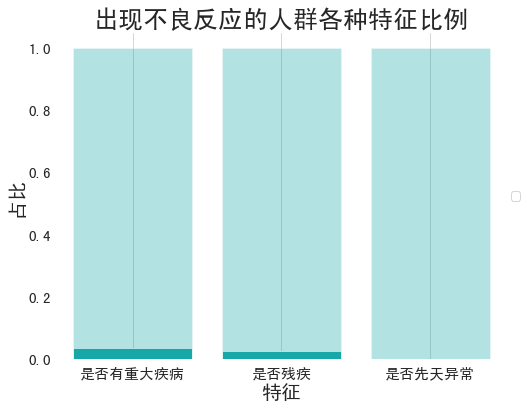

In [9]:
index = ['L_THREAT','DISABLE','BIRTH_DEFECT']
rate = []

for i in index:
    by_count = data[i].value_counts()
    rate.append(by_count['Y']/len(data))

index1 = ['是否有重大疾病', '是否残疾',  '是否先天异常']
b = {'label':index1,'rate' : rate}
df = pd.DataFrame(b)

rate2 = [1,1,1]
b2 = {'label':index1,'rate' : rate2}
df2 = pd.DataFrame(b2)

plt.figure(figsize=(8, 6))

sns.barplot(x='label', y='rate', data=df,
             color='c')
sns.barplot(x='label', y='rate', data=df2,
             color='c', alpha=0.33)
sns.despine(left=True, bottom=True)
plt.grid(axis='x')
plt.legend(loc='center left', fancybox=True, bbox_to_anchor=(1, 0.5), prop={'size': 12})
plt.xlabel('特征')
plt.ylabel('占比')
plt.title('出现不良反应的人群各种特征比例')
plt.savefig('出现不良反应的人群各种特征比例.jpg')

No handles with labels found to put in legend.


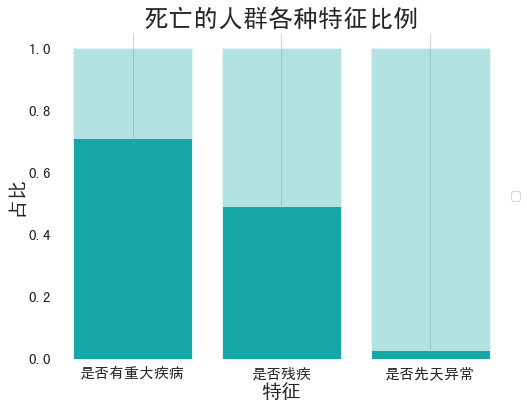

In [10]:
index = ['L_THREAT','DISABLE','BIRTH_DEFECT']
rate = []

for i in index:
    by_count = data[i].value_counts()
    rate.append(by_count['Y']/len(a))

index1 = ['是否有重大疾病', '是否残疾',  '是否先天异常']
b = {'label':index1,'rate' : rate}
df = pd.DataFrame(b)

rate2 = [1,1,1]
b2 = {'label':index1,'rate' : rate2}
df2 = pd.DataFrame(b2)

plt.figure(figsize=(8, 6))

sns.barplot(x='label', y='rate', data=df,
             color='c')
sns.barplot(x='label', y='rate', data=df2,
             color='c', alpha=0.33)
sns.despine(left=True, bottom=True)
plt.grid(axis='x')
plt.legend(loc='center left', fancybox=True, bbox_to_anchor=(1, 0.5), prop={'size': 12})
plt.xlabel('特征')
plt.ylabel('占比')
plt.title('死亡的人群各种特征比例')
plt.savefig('死亡的人群各种特征比例.jpg')

In [ ]:
def changesex(x):
    if x == 'F':
        return 0
    if x == 'M':
        x = 1
        return 1

In [ ]:
def age(x):
    if type(x) == float:
        return x
    else:
        return 9999

In [1]:
def changeyto1(x):
    if x == "Y":
        x = 1
        return x
    else:
        return 0

<Figure size 1008x1008 with 0 Axes>

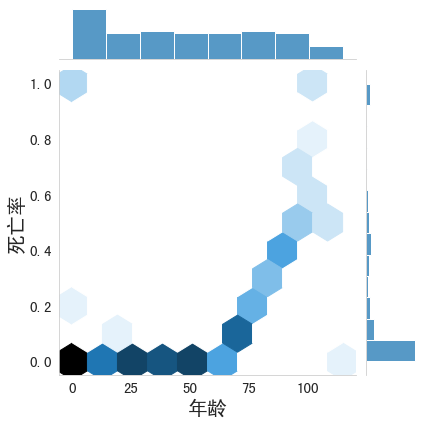

In [14]:
df_da = pd.read_csv("2021VAERSDATA-utf8.csv",encoding="utf-8")


df_da['DIED'] = df_da['DIED'].fillna(0)
df_da['DIED'] = df_da['DIED'].apply(lambda x:changeyto1(x))

df_da['AGE_YRS'] = df_da['AGE_YRS'].fillna('999')
age_null_index = df_da[df_da['AGE_YRS']=='999'].index.tolist()
df_da = df_da.drop(age_null_index)

agedeathcount = df_da['DIED'].groupby(df_da['AGE_YRS']).sum()
agecount = df_da['VAERS_ID'].groupby(df_da['AGE_YRS']).count()
agedeathcount
agecount

agedeathrate = agedeathcount/agecount

agelist = agedeathrate.index.tolist()

adrdf = pd.DataFrame({"死亡率":agedeathrate.tolist(),"年龄":agelist})
adrdf

import seaborn as sns
plt.figure(figsize=(14,14))

sns.jointplot(x = '年龄', y = '死亡率',data =adrdf, kind = 'hex')

plt.savefig('年龄与死亡率关系图.jpg')

/Users/llxblhyvia/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<Figure size 1008x1008 with 0 Axes>

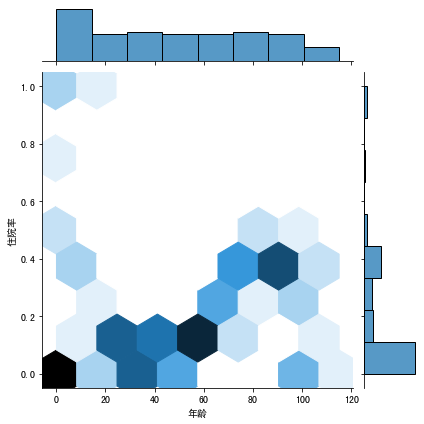

In [28]:
df_da = pd.read_csv("2021VAERSDATA-utf8.csv",encoding="utf-8")


df_da['HOSPITAL'] = df_da['HOSPITAL'].fillna(0)
df_da['HOSPITAL'] = df_da['HOSPITAL'].apply(lambda x:changeyto1(x))

df_da['AGE_YRS'] = df_da['AGE_YRS'].fillna('999')
age_null_index = df_da[df_da['AGE_YRS']=='999'].index.tolist()
df_da = df_da.drop(age_null_index)

agedeathcount = df_da['HOSPITAL'].groupby(df_da['AGE_YRS']).sum()
agecount = df_da['VAERS_ID'].groupby(df_da['AGE_YRS']).count()
agedeathcount
agecount

agedeathrate = agedeathcount/agecount

agelist = agedeathrate.index.tolist()

adrdf = pd.DataFrame({"住院率":agedeathrate.tolist(),"年龄":agelist})
adrdf


import seaborn as sns
plt.figure(figsize=(14,14))

sns.jointplot(x = '年龄', y = '住院率',data =adrdf, kind = 'hex')


plt.show()

<Figure size 1008x1008 with 0 Axes>

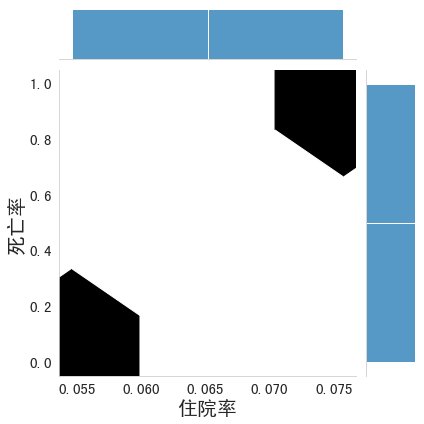

In [15]:
df_da = pd.read_csv("2021VAERSDATA-utf8.csv",encoding="utf-8")

df_da['DIED'] = df_da['DIED'].fillna(0)
df_da['DIED'] = df_da['DIED'].apply(lambda x:changeyto1(x))

df_da['HOSPITAL'] = df_da['HOSPITAL'].fillna(0)
df_da['HOSPITAL'] = df_da['HOSPITAL'].apply(lambda x:changeyto1(x))

agedeathcount = df_da['DIED'].groupby(df_da['HOSPITAL']).sum()
agecount = df_da['VAERS_ID'].groupby(df_da['HOSPITAL']).count()
agedeathcount
agecount

agedeathrate = agedeathcount/agecount

agelist = agedeathrate.index.tolist()

adrdf = pd.DataFrame({"住院率":agedeathrate.tolist(),"死亡率":agelist})
adrdf

import seaborn as sns
plt.figure(figsize=(14,14))

sns.jointplot(x = '住院率', y = '死亡率',data =adrdf,kind='hex')


plt.savefig('住院率与死亡率关系图.jpg')

<Figure size 1008x1008 with 0 Axes>

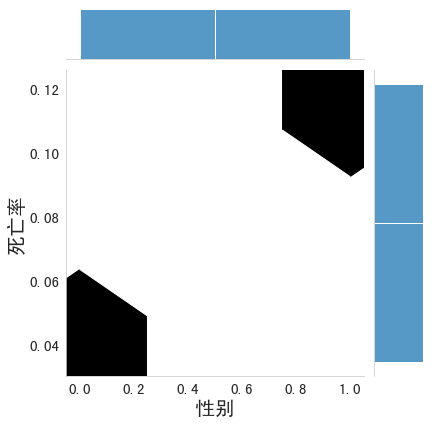

In [18]:
df_da = pd.read_csv("2021VAERSDATA-utf8.csv",encoding="utf-8")


df_da['DIED'] = df_da['DIED'].fillna(0)
df_da['DIED'] = df_da['DIED'].apply(lambda x:changeyto1(x))

df_da['SEX'] = df_da['SEX'].apply(lambda x:changesex(x))

agedeathcount = df_da['DIED'].groupby(df_da['SEX']).sum()
agecount = df_da['VAERS_ID'].groupby(df_da['SEX']).count()
agedeathcount
agecount

agedeathrate = agedeathcount/agecount

agelist = agedeathrate.index.tolist()

adrdf = pd.DataFrame({"性别":agelist,"死亡率":agedeathrate.tolist()})
adrdf

import seaborn as sns
plt.figure(figsize=(14,14))

sns.jointplot(x = '性别', y = '死亡率',data =adrdf,kind='hex')


plt.savefig('性别与死亡率关系图.jpg')